In [1]:
#author: Henrique Boneto

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
class Kernel():
    """
    Some commons KDEs implementation in 1D
    """

    def __init__(self, x: list, range: float):
        self.xn = sorted(x)
        self.N = len(x)
        self.range = range
        self.X = np.arange(self.xn[0], self.xn[self.N - 1], self.range)

    def uniform(self, h):
        f = []
        for x in self.X:
            U = filter(lambda x: abs(x) <= 1, [(x - xn) / (2 * h) for xn in self.xn])
            F = [((1 / self.N) * (1 / 2)) for u in U]
            f.append(sum(F))

        return(self.X, f)

    def gaussian(self, h):
        f = []
        for x in self.X:
            U = [(x - xn) / (2 * h) for xn in self.xn]
            F = [((1 / self.N) * (1 / np.sqrt(2*np.pi)) * (np.exp(-(1/2)*(u)**2))) for u in U]
            f.append(sum(F))
            
        return(self.X, f)    
        
    def epanechnikov(self, h):
        f = []
        for x in self.X:
            U = filter(lambda x: abs(x) <= 1, [(x - xn) / (2 * h) for xn in self.xn])
            F = [((3 / 4) * (1 / self.N) * (1 - u**2)) for u in U]
            f.append(sum(F))

        return(self.X, f)

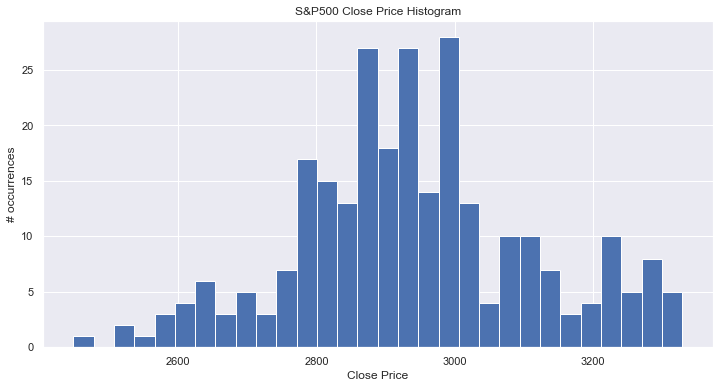

In [4]:
df = pd.read_csv('data/S&P500.csv')
df = df.dropna()
x = list(df['Close'])

sns.set()
plt.figure(figsize=(12,6))
plt.hist(df['Close'], bins = 30)
plt.title('S&P500 Close Price Histogram')
plt.xlabel('Close Price')
plt.ylabel('# occurrences')
plt.savefig('figs/hist_close_S&P500.png', dpi=300)

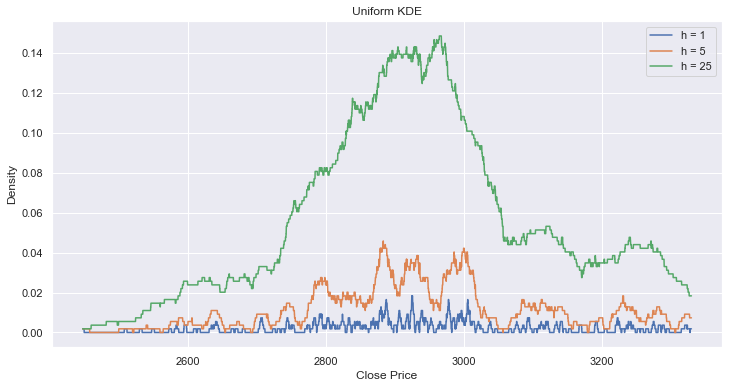

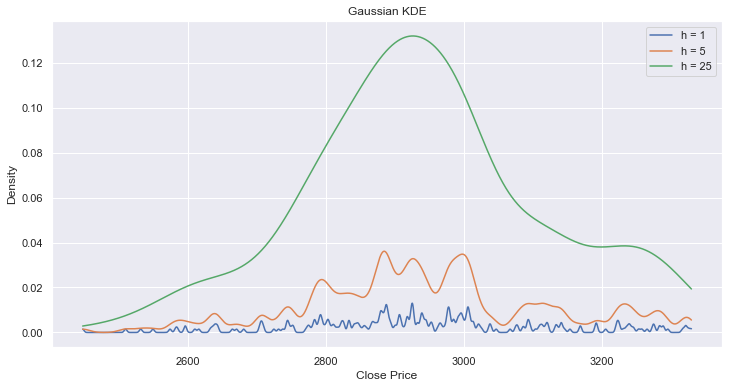

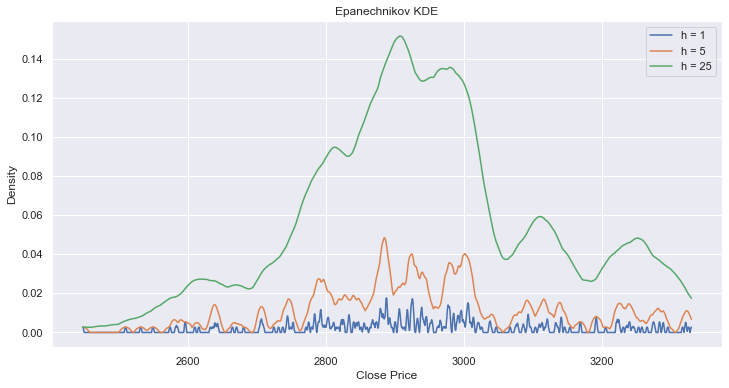

In [5]:
#instantiation
kernel = Kernel(x, 0.1)

#definition of smoothing bandwidth "h"
hs = [1,5,25]

#plotting results
plt.figure(figsize=(12,6))
plt.title('Uniform KDE')
plt.xlabel('Close Price')
plt.ylabel('Density')
for h in hs: 
    X, uniform = kernel.uniform(h)
    plt.plot(X, uniform, label='h = ' + str(h))
    plt.legend()
    plt.savefig('figs/uniform_kde.png', dpi=300)

plt.figure(figsize=(12,6))
plt.title('Gaussian KDE')
plt.xlabel('Close Price')
plt.ylabel('Density')
for h in hs: 
    X, gaussian = kernel.gaussian(h)
    plt.plot(X, gaussian, label='h = ' + str(h))
    plt.legend()
    plt.savefig('figs/gaussian_kde.png', dpi=300)

plt.figure(figsize=(12,6))
plt.title('Epanechnikov KDE')
plt.xlabel('Close Price')
plt.ylabel('Density')
for h in hs: 
    X, epanechnikov = kernel.epanechnikov(h)
    plt.plot(X, epanechnikov, label='h = ' + str(h))
    plt.legend()
    plt.savefig('figs/epanechnikov_kde.png', dpi=300)